In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
ds=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Red%20Wine/winequality-red.csv')
ds

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
ds.shape

(1599, 12)

the dataset contain 1599 rows and 12 columns in which one is target variable other 11 is independent variable

In [4]:
ds.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [4]:
numeric_col=[]
for i in ds.dtypes.index:
    if ds.dtypes[i]=='float64':
        numeric_col.append(i)
print('numeric_col',numeric_col)        

numeric_col ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [4]:
ds.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

all our columns in continous data and also target variable

In [7]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
for i in ds.columns:
    print(ds[i].value_counts())
    
    


7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: fixed acidity, Length: 96, dtype: int64
0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: volatile acidity, Length: 143, dtype: int64
0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: citric acid, Length: 80, dtype: int64
2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: residual sugar, Length: 91, dtype: int64
0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
         ..
0.108     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: chlorides, Length: 153, dtype: int64
6.0     138
5.0     104
10.0     79
15.0     78
12.0     75
7.0      71
9.0      62
16.0     61
17.0     60
11

In [5]:
threshold=7
ds['quality']= (ds['quality']>= threshold).astype(int)

In [6]:
ds['quality'].unique()

array([0, 1])

In [5]:
ds.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [11]:
#statistics summary of dataset
ds.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.135710
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.342587
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,0.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,0.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


#description given below of this dataset
1) there is no null  values present in any of the columns hence its look like perfect
2) the mean value of columns fixedacidity, citric acid, residual sugar, free sulfer dioxide, total sulferdioxide,sulphate are more
   then median value  hence data is right skewed on this columns
3) in some columns more differnce between max and 75% of dataset hence possibility to outlier present in these columns
4) we have also notice std deviation and meean and 25% percentile values which is well manner

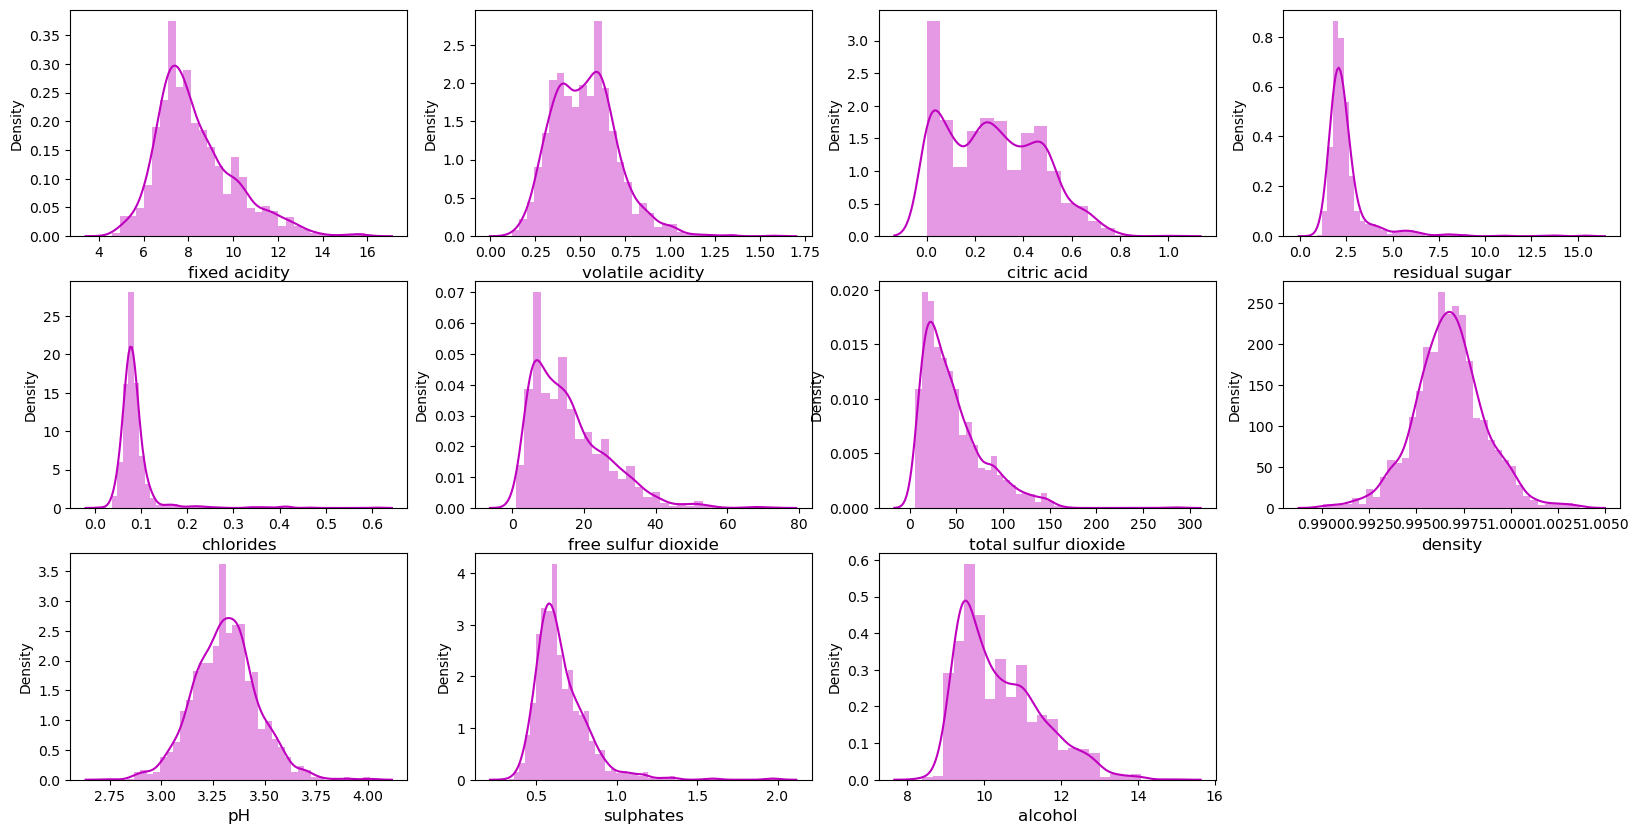

In [6]:
#visualization of numeric columns
plt.figure(figsize=(20,10), facecolor='white')
plotnumber=1
for col in numeric_col:
    if plotnumber<=12:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(ds[col],color='m')
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.show()

we can see that there is normally distributed of data in all columnse because a well shape curved is maintain in each column 

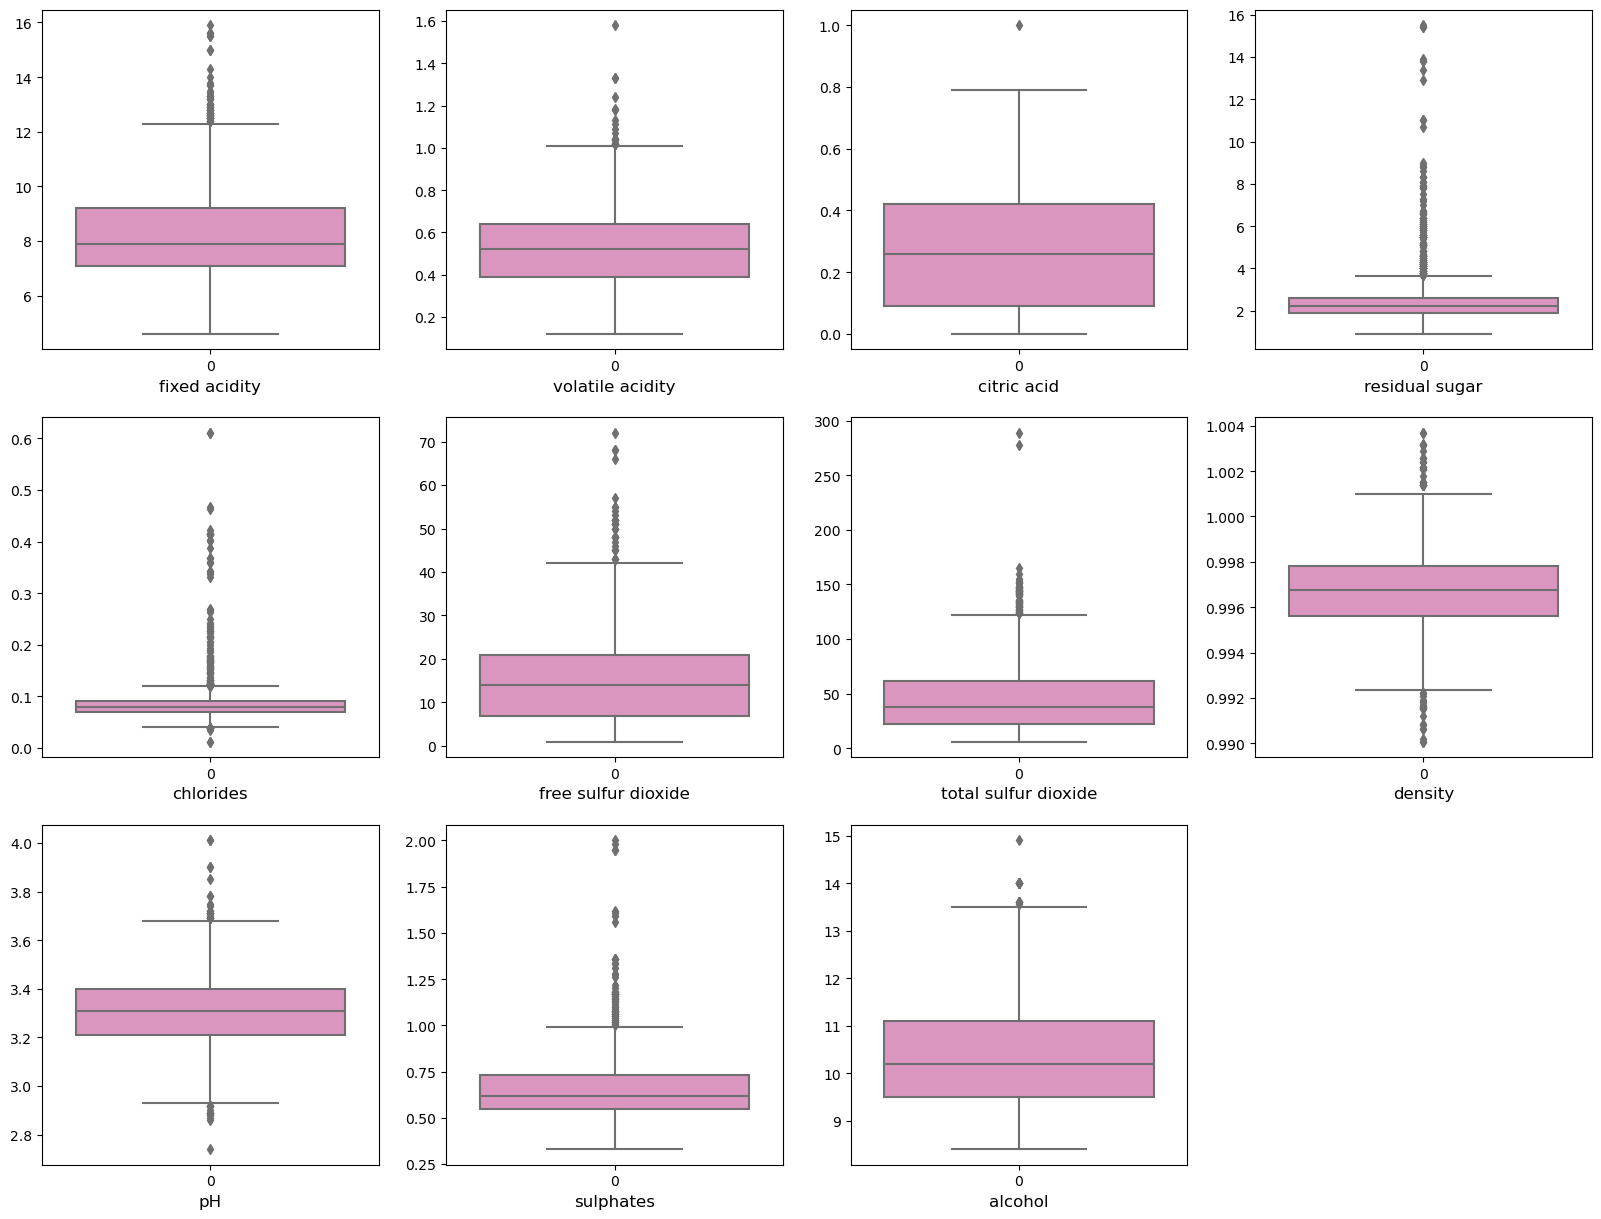

In [6]:
# checking for outliers from ploting boxplot
plt.figure(figsize=(20,15), facecolor='white')
plotnumber=1
for col in numeric_col:
    if plotnumber<=12:
        ax=plt.subplot(3,4,plotnumber)
        sns.boxplot(ds[col],palette='Set2_r')
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.show()

we see so many outlier present in all columns
so we removing it through zscore method or iqr method 

In [7]:
from scipy.stats import zscore

In [ ]:
 ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

In [8]:
out_features = ds[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide',
                  'density','pH','sulphates','alcohol']]
z = np.abs(zscore(out_features))
z

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.528360,0.961877,1.391472,0.453218,0.243707,0.466193,0.379133,0.558274,1.288643,0.579207,0.960246
1,0.298547,1.967442,1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,0.719933,0.128950,0.584777
2,0.298547,1.297065,1.186070,0.169427,0.096353,0.083669,0.229047,0.134264,0.331177,0.048089,0.584777
3,1.654856,1.384443,1.484154,0.453218,0.264960,0.107592,0.411500,0.664277,0.979104,0.461180,0.584777
4,0.528360,0.961877,1.391472,0.453218,0.243707,0.466193,0.379133,0.558274,1.288643,0.579207,0.960246
...,...,...,...,...,...,...,...,...,...,...,...
1594,1.217796,0.403229,0.980669,0.382271,0.053845,1.542054,0.075043,0.978765,0.899886,0.461180,0.072294
1595,1.390155,0.123905,0.877968,0.240375,0.541259,2.211469,0.137820,0.862162,1.353436,0.601055,0.729364
1596,1.160343,0.099554,0.723916,0.169427,0.243707,1.255161,0.196679,0.533554,0.705508,0.542042,0.541630
1597,1.390155,0.654620,0.775267,0.382271,0.264960,1.542054,0.075043,0.676657,1.677400,0.305990,0.209308


In [9]:
#threshold=3
np.where(z>3)

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
          45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
         106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
         151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
         244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
         354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
         467,  480,  480,  494,  515,  544,  554,  554,  555,  555,  557,
         557,  568,  584,  588,  591,  595,  608,  614,  636,  639,  649,
         649,  651,  652,  652,  652,  672,  672,  684,  690,  692,  692,
         695,  723,  724,  730,  754,  776,  777,  795,  821,  836,  837,
         889,  911,  917,  923,  925,  926,  982, 1017, 1018, 1043, 1051,
        1051, 1071, 1074, 1079, 1079, 1081, 1081, 1111, 1114, 1131, 1154,
        1165, 1175, 1186, 1231, 1235, 1244, 1244, 1244, 1260, 1269, 1269,
        1270, 1270, 1288, 1289, 1295, 

In [10]:
z.iloc[15,5]

3.359038194288537

In [11]:
z.iloc[164,3]

3.307014626286532

In [10]:
#now removing data above zscore and store in new dataframe
ds1 = ds[(z<3).all(axis=1)]
ds1.shape

(1458, 12)

after applying zscore to remove outlier hence we say that there is no much to be loss inthe data hence done with this dataset

In [15]:
ds1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [11]:
#checking skewness of dataset
ds1.skew()

fixed acidity           0.820879
volatile acidity        0.392097
citric acid             0.292600
residual sugar          2.450707
chlorides               2.307274
free sulfur dioxide     0.869727
total sulfur dioxide    1.185230
density                 0.055543
pH                      0.113039
sulphates               0.893297
alcohol                 0.757396
quality                 2.103030
dtype: float64

there is three columns which is not acceptable range in skewness hence removing skewness through cube root method 

In [12]:
ds1['fixed acidity'] = np.cbrt(ds1['fixed acidity'])
ds1['residual sugar']= np.cbrt(ds1['residual sugar'])
ds1['chlorides']= np.cbrt(ds1['chlorides'])
ds1['free sulfur dioxide']= np.cbrt(ds1['free sulfur dioxide'])
ds1['total sulfur dioxide']= np.cbrt(ds1['total sulfur dioxide'])
ds1['sulphates']= np.cbrt(ds1['sulphates'])
ds1['alcohol']= np.cbrt(ds1['alcohol'])

In [13]:
ds1.skew()

fixed acidity           0.527560
volatile acidity        0.392097
citric acid             0.292600
residual sugar          1.629756
chlorides               1.056128
free sulfur dioxide     0.127793
total sulfur dioxide    0.343010
density                 0.055543
pH                      0.113039
sulphates               0.526494
alcohol                 0.643830
quality                 2.103030
dtype: float64

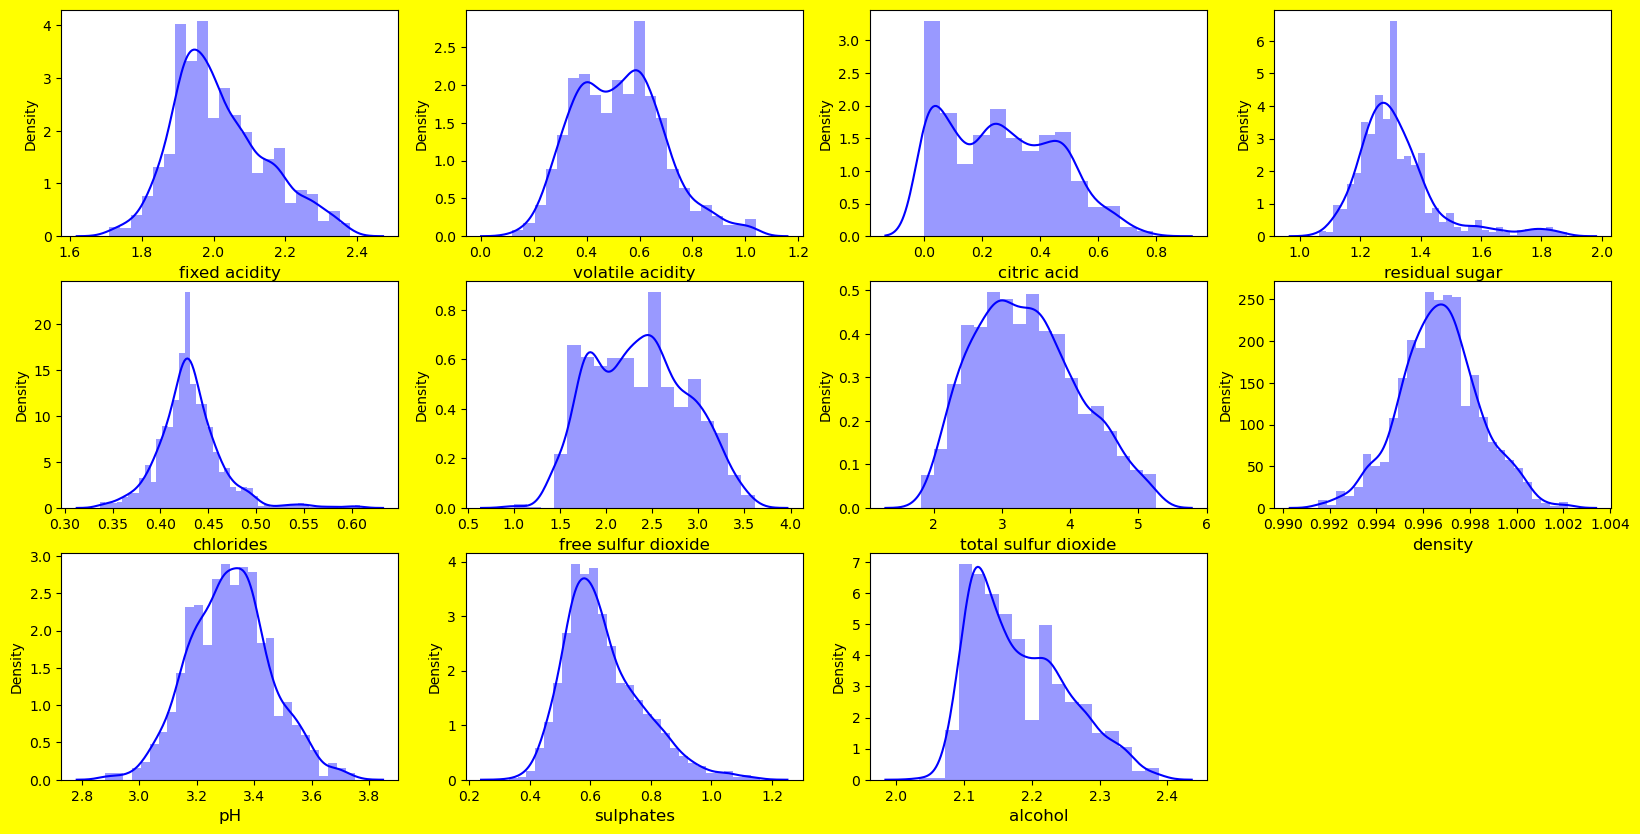

In [15]:
plt.figure(figsize=(20,10), facecolor='yellow')
plotnumber=1
for col in numeric_col:
    if plotnumber<=12:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(ds1[col],color='b')
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.show()

In [20]:
# checking correlation between features and target variable
ds1.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.296687,0.696169,0.196737,0.218480,-0.165764,-0.098864,0.663596,-0.716596,0.195504,-0.031849,0.121865
volatile acidity,-0.296687,1.000000,-0.589286,0.035657,0.077700,0.032589,0.102031,-0.000446,0.252900,-0.355067,-0.212976,-0.268236
citric acid,0.696169,-0.589286,1.000000,0.186738,0.105771,-0.097483,-0.015382,0.372338,-0.521270,0.307518,0.163903,0.226809
residual sugar,0.196737,0.035657,0.186738,1.000000,0.165153,0.003969,0.095767,0.372759,-0.076746,0.068781,0.163337,0.103132
chlorides,0.218480,0.077700,0.105771,0.165153,1.000000,-0.041496,0.065122,0.375113,-0.197425,0.009585,-0.244662,-0.129038
free sulfur dioxide,-0.165764,0.032589,-0.097483,0.003969,-0.041496,1.000000,0.751304,-0.041366,0.126631,0.050594,-0.087483,-0.094547
total sulfur dioxide,-0.098864,0.102031,-0.015382,0.095767,0.065122,0.751304,1.000000,0.132889,0.020039,-0.011570,-0.267689,-0.182061
density,0.663596,-0.000446,0.372338,0.372759,0.375113,-0.041366,0.132889,1.000000,-0.311217,0.131361,-0.466713,-0.154221
pH,-0.716596,0.252900,-0.521270,-0.076746,-0.197425,0.126631,0.020039,-0.311217,1.000000,-0.030247,0.137413,-0.079528
sulphates,0.195504,-0.355067,0.307518,0.068781,0.009585,0.050594,-0.011570,0.131361,-0.030247,1.000000,0.250213,0.312689


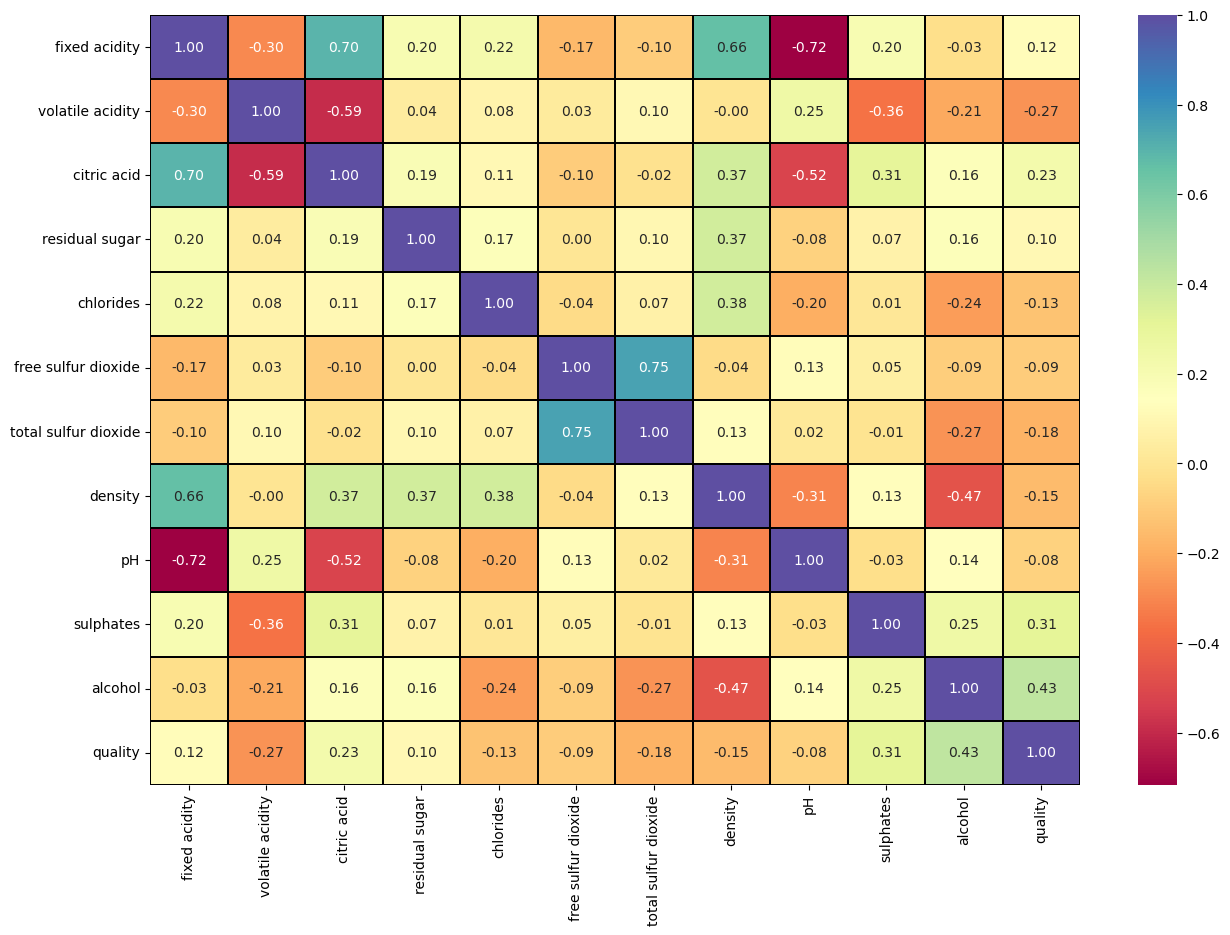

In [21]:
plt.figure(figsize=(15,10))
sns.heatmap(ds1.corr(), linewidths = 0.2, fmt = '.2f', linecolor= 'black', annot = True, cmap = 'Spectral')
plt.show()

we notice some  of columns are more positive correlation with target variable and some is negative correlation with that all is our 
isok

In [14]:
# separate variblesin to two parts target and features x,y
x = ds1.drop('quality',axis=1)
y = ds1['quality']

print('feature dim.',x.shape)
print('target dim.',y.shape)

feature dim. (1458, 11)
target dim. (1458,)


In [15]:
#standardized our data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(x)
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1.948695,0.70,0.00,1.238562,0.423582,2.223980,3.239612,0.9978,3.51,0.824257,2.110454
1,1.983192,0.88,0.00,1.375069,0.461044,2.924018,4.061548,0.9968,3.20,0.879366,2.139975
2,1.983192,0.76,0.04,1.320006,0.451436,2.466212,3.779763,0.9970,3.26,0.866239,2.139975
3,2.237378,0.28,0.56,1.238562,0.421716,2.571282,3.914868,0.9980,3.16,0.833955,2.139975
4,1.948695,0.70,0.00,1.238562,0.423582,2.223980,3.239612,0.9978,3.51,0.824257,2.110454


In [ ]:
# now we can build model

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [23]:
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.30, random_state= i)
    rfr= RandomForestClassifier()
    rfr.fit(x_train,y_train)
    pred= rfr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print('best accuracy is', maxAccu, 'at random state', maxRS)

best accuracy is 0.9406392694063926 at random state 26


In [24]:
#creating train test split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.30, random_state= maxRS)

In [26]:
rfc =  RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc = rfc.predict(x_test)
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

0.9315068493150684
[[377  17]
 [ 13  31]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       394
           1       0.65      0.70      0.67        44

    accuracy                           0.93       438
   macro avg       0.81      0.83      0.82       438
weighted avg       0.93      0.93      0.93       438



In [42]:
Lr =  LogisticRegression()
Lr.fit(x_train,y_train)
predLr = Lr.predict(x_test)
print('accracy_score :',accuracy_score(y_test,predLr))
print('confusion matrix :',confusion_matrix(y_test,predLr))
print(classification_report(y_test,predLr))


accracy_score : 0.9041095890410958
confusion matrix : [[386   8]
 [ 34  10]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       394
           1       0.56      0.23      0.32        44

    accuracy                           0.90       438
   macro avg       0.74      0.60      0.64       438
weighted avg       0.88      0.90      0.89       438



In [43]:
gbt = GradientBoostingClassifier() 
gbt.fit(x_train,y_train)
predgbt = gbt.predict(x_test)
print('accracy_score :',accuracy_score(y_test,predgbt))
print('confusion matrix :',confusion_matrix(y_test,predgbt))
print(classification_report(y_test,predgbt))


accracy_score : 0.9360730593607306
confusion matrix : [[376  18]
 [ 10  34]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       394
           1       0.65      0.77      0.71        44

    accuracy                           0.94       438
   macro avg       0.81      0.86      0.84       438
weighted avg       0.94      0.94      0.94       438



In [58]:
dtc =  DecisionTreeClassifier() 
dtc.fit(x_train,y_train)
pred2 = dtc.predict(x_test)
print('accracy_score :',accuracy_score(y_test,pred2))
print('confusion matrix :',confusion_matrix(y_test,pred2))
print(classification_report(y_test,pred2))

accracy_score : 0.8881278538812786
confusion matrix : [[354  40]
 [  9  35]]
              precision    recall  f1-score   support

           0       0.98      0.90      0.94       394
           1       0.47      0.80      0.59        44

    accuracy                           0.89       438
   macro avg       0.72      0.85      0.76       438
weighted avg       0.92      0.89      0.90       438



# for checking cross val score of our models

In [44]:
cv=5
score= cross_val_score(gbt,x,y,cv=5)
print(score)
print('mean :',score.mean())

[0.89383562 0.83561644 0.88356164 0.82817869 0.88316151]
mean : 0.8648707809631409


In [45]:
cv=5
score= cross_val_score(Lr,x,y,cv=5)
print(score)
print('mean :',score.mean())

[0.87328767 0.8869863  0.86643836 0.8556701  0.8556701 ]
mean : 0.8676105069905381


In [46]:
cv=5
score= cross_val_score(rfc,x,y,cv=5)
print(score)
print('mean :',score.mean())

[0.88013699 0.8630137  0.87671233 0.86254296 0.86597938]
mean : 0.869677070093678


In [47]:
#nowwe can cheking hyper perameter tuning on the model(decision tree)

In [48]:
from sklearn .model_selection import GridSearchCV

In [53]:
params = {'criterion':['gini','entropy'],'random_state':[10,100,30],
         'max_depth': [0,10,20], 'min_samples_split':[5,8,10],
         'max_leaf_nodes': [30,10.40]}

In [54]:
gcv =  GridSearchCV( DecisionTreeClassifier(),params,cv=5)
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20], 'max_leaf_nodes': [30, 10.4],
                         'min_samples_split': [5, 8, 10],
                         'random_state': [10, 100, 30]})

In [55]:
gcv.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_leaf_nodes': 30,
 'min_samples_split': 5,
 'random_state': 10}

In [57]:
final_model=  DecisionTreeClassifier(criterion= 'gini', max_depth=10,max_leaf_nodes=30, min_samples_split= 5,random_state=10)
final_model.fit(x_train,y_train)
pred1 = final_model.predict(x_test)
acc = accuracy_score(y_test,pred1)
print(acc)

0.8881278538812786


now our model accuracy increases to previous one so our our final model is decisiontreeclassifier and proceed with this

In [59]:
#now save our model using pickle
